<a href="https://colab.research.google.com/github/sudhatisaipavan/ADMB_27/blob/main/ADMB.1834.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

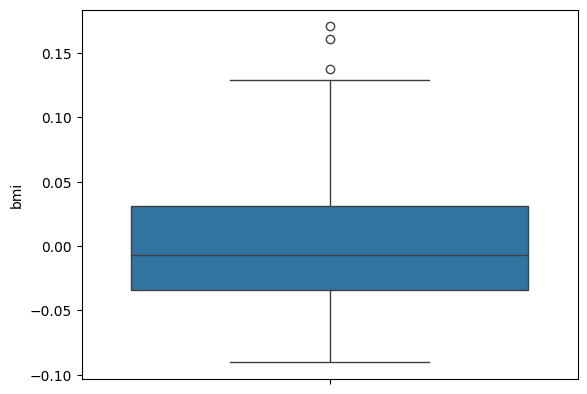

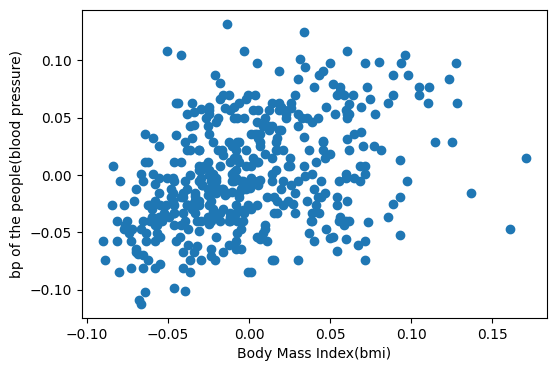

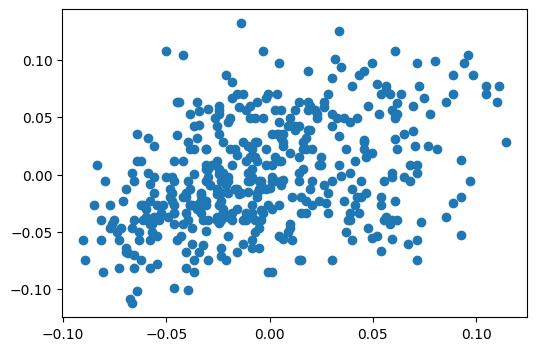

In [17]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt # Changed this line
#Load the dataset
diabetics=load_diabetes()
df_diabetics = pd.DataFrame(diabetics.data, columns=diabetics.feature_names) # Convert to DataFrame
df_diabetics['target'] = diabetics.target # Add the target variable
import seaborn as sns
sns.boxplot(df_diabetics['bmi'])
fig,ax=plt.subplots(figsize=(6,4))
ax.scatter(df_diabetics['bmi'],df_diabetics['bp'])
ax.set_xlabel('Body Mass Index(bmi)')
ax.set_ylabel('bp of the people(blood pressure)')
import seaborn as sns
import matplotlib.pyplot as plt

def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold] # Corrected indentation

    sns.boxplot(removed_outliers[column]) # Corrected indentation
    plt.title(f'Box plot of {column} after removing outliers')
    plt.show()
import numpy as np
outlier_indices=np.where((df_diabetics['bmi']>0.12)&(df_diabetics['bp']<0.8))
no_outliers=df_diabetics.drop(outlier_indices[0])
fig,ax_no_outliers=plt.subplots(figsize=(6,4))
ax_no_outliers.scatter(no_outliers['bmi'],no_outliers['bp'])
plt.show()

In [18]:
import numpy as np
from scipy import stats
z = np.abs(stats.zscore(df_diabetics['age']))
print(z)

0      0.800500
1      0.039567
2      1.793307
3      1.872441
4      0.113172
         ...   
437    0.876870
438    0.115937
439    0.876870
440    0.956004
441    0.956004
Name: age, Length: 442, dtype: float64


In [19]:
import numpy as np
outlier_indices = np.where(z>2)[0]
no_outliers = df_diabetics.drop(outlier_indices)
print(no_outliers.shape)
"OR"
outlier_indices = np.where(z>2)[0]
no_outliers=df_diabetics.drop(outlier_indices)


print(df_diabetics.shape)
print("=======================")
print(no_outliers.shape)

(426, 11)
(442, 11)
(426, 11)


In [20]:
Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')

Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')

IQR = Q3- Q1

print(IQR)

0.06520763046978838


In [21]:
upper = Q3+1.5*IQR

upper_array = np.array(df_diabetics['bmi'] >= upper)

print("Upper Bound is:", upper)

print("------------------")
print(upper_array.sum())

lower = Q1-1.5*IQR

lower_array = np.array(df_diabetics['bmi'] <= lower)

print("Lower Bound is:", lower)

print("-------------------")

print(lower_array.sum())

Upper Bound is: 0.12879000811776306
------------------
3
Lower Bound is: -0.13204051376139045
-------------------
0
